In [98]:
# Dependencies
import numpy as np

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, cast

In [99]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [100]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [101]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [102]:
#  3. Convert the June temperatures to a list.
june_temps = []
june_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [103]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
import pandas as pd
june_df = pd.DataFrame(june_temps, columns=['date','temperature'])
june_df

,date,temperature
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0
...,...,...
1695,2017-06-26,79.0
1696,2017-06-27,74.0
1697,2017-06-28,74.0
1698,2017-06-29,76.0


In [104]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [105]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [106]:
# 7. Convert the December temperatures to a list.
dec_temps = []
dec_temps = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [107]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps, columns=['date','temperature'])
dec_df

,date,temperature
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0
...,...,...
1512,2016-12-27,71.0
1513,2016-12-28,71.0
1514,2016-12-29,69.0
1515,2016-12-30,65.0


In [108]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3 Statistical Analysis

In [109]:
%matplotlib Inline
import matplotlib.pyplot as plt

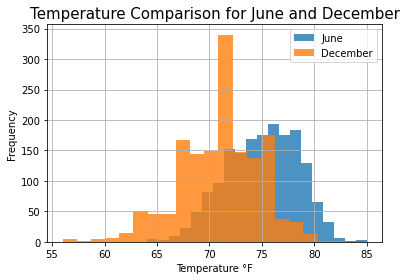

In [110]:
# Plot the temperature data for comparing
ax = june_df.plot.hist(bins=20,alpha = 0.8)
dec_df.plot.hist(bins=20, alpha=0.8, ax=ax)
ax.set_title('Temperature Comparison for June and December', fontsize=15)
ax.set_xlabel('Temperature °F')
ax.legend(['June','December'])
ax.grid()
plt.savefig("./Resources/temp_fig.png")

In [111]:
from sqlalchemy import inspect
inspector = inspect(engine)
columns = inspector.get_columns('Station')
pd.DataFrame(columns)

,name,type,nullable,default,autoincrement,primary_key
0,id,INTEGER,False,None,auto,1
1,station,TEXT,True,None,auto,0
2,name,TEXT,True,None,auto,0
3,latitude,FLOAT,True,None,auto,0
4,longitude,FLOAT,True,None,auto,0
5,elevation,FLOAT,True,None,auto,0


In [112]:
# Extract the precipitation data for June and December
jun_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()
dec_prcp = session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

In [113]:
# June precipitation DataFrame
jun_prcp_df = pd.DataFrame(jun_prcp, columns=['date','precipitation'])
jun_prcp_df

,date,precipitation
0,2010-06-01,0.00
1,2010-06-02,0.01
2,2010-06-03,0.00
3,2010-06-04,0.00
4,2010-06-05,0.00
...,...,...
1695,2017-06-26,0.02
1696,2017-06-27,0.10
1697,2017-06-28,0.02
1698,2017-06-29,0.04


In [117]:
jun_prcp_df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [114]:
# December precipitation Data Frame
dec_prcp_df = pd.DataFrame(dec_prcp, columns=['date','precipitation'])
dec_prcp_df

,date,precipitation
0,2010-12-01,0.04
1,2010-12-03,0.00
2,2010-12-04,0.00
3,2010-12-06,0.00
4,2010-12-07,0.00
...,...,...
1512,2016-12-27,0.14
1513,2016-12-28,0.14
1514,2016-12-29,1.03
1515,2016-12-30,2.37


In [116]:
dec_prcp_df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


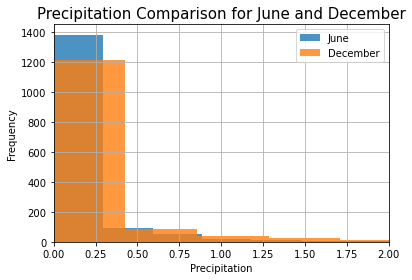

In [115]:
# Plot rain frequency
ax = jun_prcp_df.plot.hist(bins=15,alpha = 0.8)
dec_prcp_df.plot.hist(bins=15, alpha=0.8, ax=ax)
ax.set_title('Precipitation Comparison for June and December', fontsize=15)
ax.set_xlabel('Precipitation')
ax.set_xlim(0,2)
ax.legend(['June','December'])
ax.grid()
plt.savefig("./Resources/prcp_fig.png")